### Este notebook Genera una carpeta con todas las imágenes que tienen masas o calcificaciones.

In [1]:
import os
import shutil
import pandas as pd

# Rutas a las carpetas y archivos CSV
csv_path = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/csv/filtered_with_image_names.csv'
source_images_dir = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/original/Vindrmammo/images'
destination_images_dir = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/subset_datos/Images_Mass_Calc'

# Cargar el archivo CSV
filtered_df = pd.read_csv(csv_path)

# Eliminar duplicados basados en 'image_id', manteniendo solo la primera ocurrencia
filtered_unique_df = filtered_df.drop_duplicates(subset='image_id', keep='first')

# Función para copiar la imagen a la carpeta de destino manteniendo la estructura de directorios
def copy_image(image_id, study_id, source_dir, destination_dir):
    # Ruta de la imagen en el directorio original
    source_image_path = os.path.join(source_dir, study_id, image_id + '.dicom')
    
    # Crear la misma estructura de carpetas en el directorio de destino
    destination_study_dir = os.path.join(destination_dir, study_id)
    
    # Si no existe la carpeta de destino, crearla
    os.makedirs(destination_study_dir, exist_ok=True)
    
    # Ruta de la imagen en la carpeta de destino
    destination_image_path = os.path.join(destination_study_dir, image_id + '.dicom')
    
    # Copiar la imagen si no existe ya en la carpeta de destino
    if not os.path.exists(destination_image_path):
        shutil.copy2(source_image_path, destination_image_path)
        print(f"Imagen {image_id} copiada a {destination_image_path}")
    else:
        print(f"Imagen {image_id} ya existe en la carpeta de destino, omitiendo...")

# Recorrer las imágenes únicas y copiarlas a la carpeta de destino
for index, row in filtered_unique_df.iterrows():
    image_id = row['image_id']
    study_id = row['study_id']
    
    # Copiar la imagen a la carpeta de destino manteniendo la estructura
    copy_image(image_id, study_id, source_images_dir, destination_images_dir)

print("Proceso de copia completado.")


Imagen 001ade2a3cb53fd808bd2856a0df5413 copiada a /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/subset_datos/Images_Mass_Calc/8b202f831f93639ebcb9cccccec03b09/001ade2a3cb53fd808bd2856a0df5413.dicom
Imagen 002074412a8fc178c271fb93b55c3e29 copiada a /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/subset_datos/Images_Mass_Calc/b9c15e629cf02f501acbc194420d749c/002074412a8fc178c271fb93b55c3e29.dicom
Imagen 002460132586dc0c7b88a59dce6e77bd copiada a /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/subset_datos/Images_Mass_Calc/76c60021bdad852f982497bb6dfa6cf2/002460132586dc0c7b88a59dce6e77bd.dicom
Imagen 00857417d07096982013956033da1f75 copiada a /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/subset_datos/Images_Mass_Calc/14a63118d94643a3d65b32039a20b351/00857417d07096982013956033da1f75.dicom
Imagen 008c66563c73b2f5b8e42915b2cd6af5 copiada a /Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/pr

In [2]:
# Función para contar el número de archivos .dicom en una carpeta (incluyendo subcarpetas)
def count_dicom_files(directory):
    dicom_count = 0
    for root, dirs, files in os.walk(directory):
        dicom_count += len([f for f in files if f.endswith('.dicom')])
    return dicom_count

# Contar cuántas imágenes .dicom se copiaron en total
total_images = count_dicom_files(destination_images_dir)

print(f"Proceso de copia completado. Total de imágenes copiadas: {total_images}")

Proceso de copia completado. Total de imágenes copiadas: 1255


In [22]:
### Ya tenemos las imagenes copiadas a la carpeta en cuestión.


#### Ahora visualizamos imagenes en distintas interpretaciones fotométricas. Notamos que al aplicar el VoiLut las imagenes
#### se ven de manera uniforme.

Visualizando imagen con Photometric Interpretation: MONOCHROME1


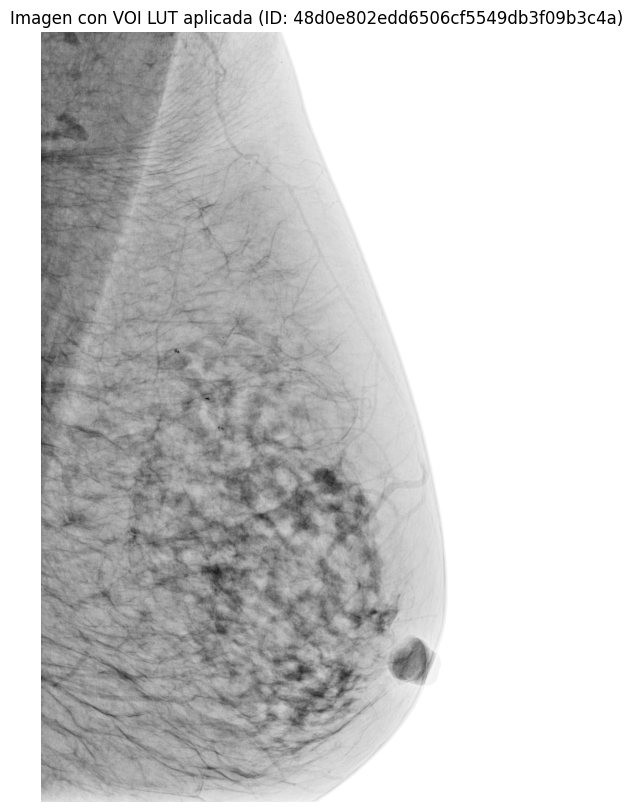

Visualizando imagen con Photometric Interpretation: MONOCHROME2


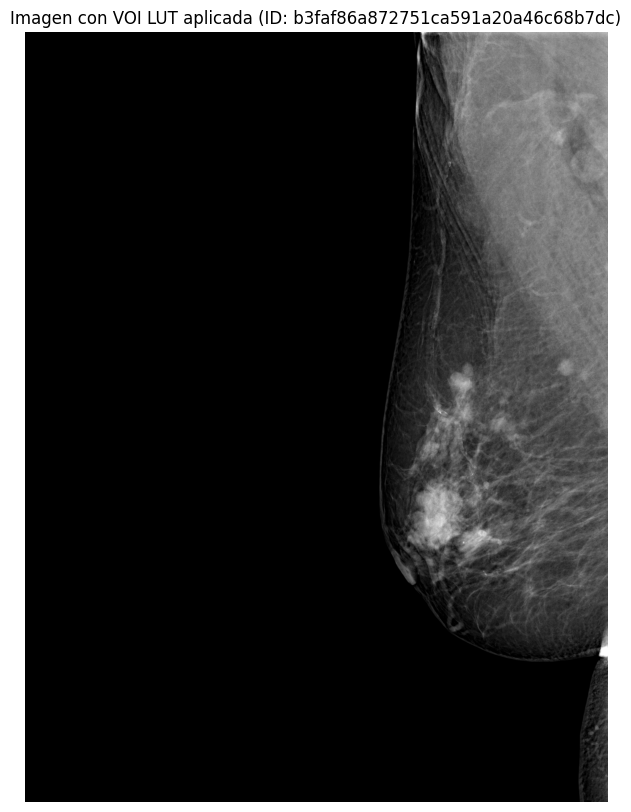

In [23]:
import os
import pydicom
import matplotlib.pyplot as plt
from pydicom.pixel_data_handlers.util import apply_voi_lut
import pandas as pd

# Ruta al dataset DICOM
dicom_root = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/subset_datos/Images_Mass_Calc'

# Función para obtener la ruta del archivo DICOM dado el image_id y study_id
def get_dicom_path(image_id, study_id, root_dir):
    return os.path.join(root_dir, study_id, image_id + '.dicom')

# Función para leer el archivo DICOM y aplicar VOI LUT, mostrando solo la imagen con LUT
def visualize_dicom_with_lut(image_id, study_id):
    dicom_path = get_dicom_path(image_id, study_id, dicom_root)
    dicom = pydicom.dcmread(dicom_path)
    
    # Imagen original sin aplicar VOI LUT (para ser transformada)
    original_image = dicom.pixel_array
    
    # Aplicar VOI LUT con prefer_lut=True (priorizando LUT si está presente)
    voi_image_with_lut = apply_voi_lut(original_image, dicom, prefer_lut=True)
    
    # Mostrar la imagen ajustada con VOI LUT
    plt.figure(figsize=(10, 10))  # Tamaño más grande para la imagen
    plt.imshow(voi_image_with_lut, cmap='gray')
    plt.title(f"Imagen con VOI LUT aplicada (ID: {image_id})")
    plt.axis('off')  # Ocultar los ejes para una visualización limpia
    plt.show()

# Ruta al CSV de anotaciones
annotations_csv = '/Volumes/m2/Memoria/Code/PMM/VinDr-Mammo-Preprocessing/data/processed/csv/filtered_with_image_names.csv'
findings = pd.read_csv(annotations_csv)

# Filtrar el CSV para obtener una imagen con Photometric Interpretation MONOCHROME1
monochrome1_row = findings[findings['Photometric Interpretation'] == 'MONOCHROME1'].sample(n=1).iloc[0]
monochrome1_image_id = monochrome1_row['image_id']
monochrome1_study_id = monochrome1_row['study_id']

# Filtrar el CSV para obtener una imagen con Photometric Interpretation MONOCHROME2
monochrome2_row = findings[findings['Photometric Interpretation'] == 'MONOCHROME2'].sample(n=1).iloc[0]
monochrome2_image_id = monochrome2_row['image_id']
monochrome2_study_id = monochrome2_row['study_id']

# Visualizar la imagen con Photometric Interpretation MONOCHROME1
print("Visualizando imagen con Photometric Interpretation: MONOCHROME1")
visualize_dicom_with_lut(monochrome1_image_id, monochrome1_study_id)

# Visualizar la imagen con Photometric Interpretation MONOCHROME2
print("Visualizando imagen con Photometric Interpretation: MONOCHROME2")
visualize_dicom_with_lut(monochrome2_image_id, monochrome2_study_id)
